# Simple RNN ( Many-to-one 문제 )

### - 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
### - 3개의 순서열을 입력한 수 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = np.sin(2*np.pi/8. * np.arange(20)) ; s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

In [3]:
s = np.sin(np.pi/4. * np.arange(20)) ; s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

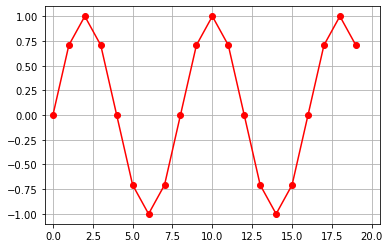

In [4]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

## 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환 
 ( 대각선위 성분들이 같은 정사각 행렬)

In [6]:
from scipy.linalg import toeplitz

S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5, :4]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01]])

In [7]:
S.shape

(19, 20)

In [8]:
X_train = S[:-1, :3][:, :, np.newaxis]
y_train = S[:-1, 3]
X_train.shape, y_train.shape

((18, 3, 1), (18,))

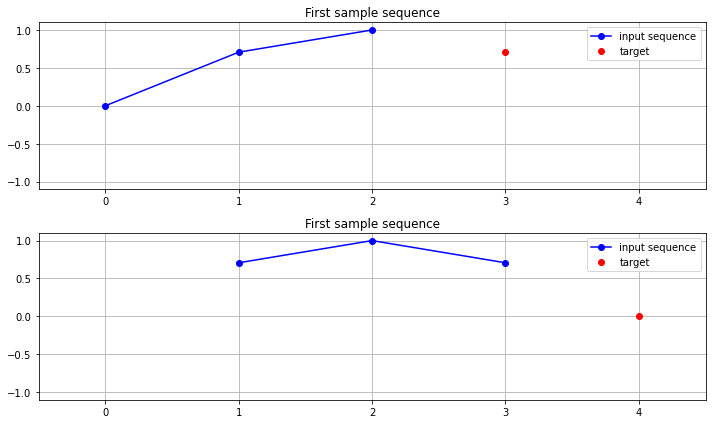

In [9]:
plt.figure(figsize= (10,6))

plt.subplot(211)
plt. plot([0,1,2], X_train[0].flatten(), 'bo-', label = 'input sequence')
plt.plot([3], y_train[0], 'ro', label = 'target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1); plt.legend()
plt.grid(); plt.title('First sample sequence')

plt.subplot(212)
plt. plot([1,2,3], X_train[1].flatten(), 'bo-', label = 'input sequence')
plt.plot([4], y_train[1], 'ro', label = 'target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1); plt.legend()
plt.grid(); plt.title('First sample sequence')

plt.tight_layout();plt.show()

## 순환신경망 모델 정의/ 설정

In [10]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [12]:
# numpy verssion 확인 : 1.20.2에서는 안돌아가 1.19.5로 downgrade해야함! 
model = Sequential([
    SimpleRNN(10, input_shape = X_train.shape[1:], activation='tanh'),
    Dense(1, activation = 'linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mse')

# 모델 학습전

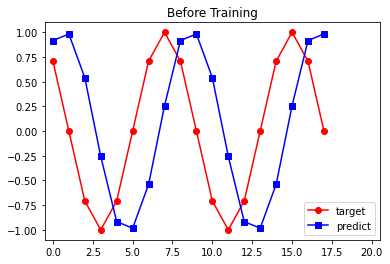

In [15]:
plt.plot(y_train, 'ro-',label = 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label = 'predict')
plt.xlim(-0.5, 20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title('Before Training')
plt.show()

## 모델학습  

In [17]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

## 학습결과 확인

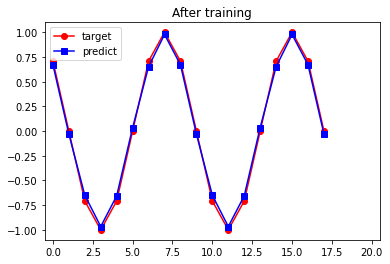

In [18]:
plt.plot(y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='predict')
plt.xlim(-0.5,20.5); plt.ylim(-1.1,1.1)
plt.legend(); plt.title("After training")
plt.show()

[]

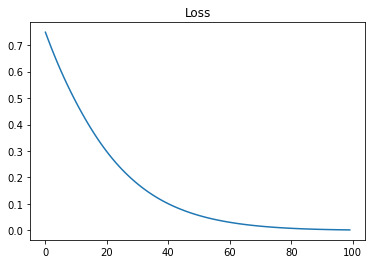

In [19]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.plot()